# Importiere Pakete

In [1]:
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx

from IPython.display import display, HTML

plt.style.use('fivethirtyeight')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)
pd.set_option('future.no_silent_downcasting', True)

np.random.seed(42)

# Lade Datensatz

In [2]:
DATA_DIR = Path("./HUK_MA_CC/")

interesse = pd.read_csv(DATA_DIR/"interesse.csv", sep=",")
alter_geschlecht = pd.read_csv(DATA_DIR/"alter_geschlecht.csv", sep=",")
rest = pd.read_csv(DATA_DIR/"rest.csv", sep=";")

# Explorative Datenanalyse

## Hilfsfunktionen

In [3]:
def create_info_table(df: pd.DataFrame) -> pd.DataFrame:
    df_merged_info = pd.DataFrame({"dtypes": df.infer_objects(False).dtypes, "num_nans": df.isna().sum(), "nunique": df.nunique()})
    df_merged_info_with_describe = pd.concat([df_merged_info, df.describe().T], axis=1)
    return df_merged_info_with_describe

In [4]:
def print_unique_values(df: pd.DataFrame, columns: list[str]=None) -> None:
    columns = columns or df.columns
    for column in columns:
        unique_values = df[column].unique()
        nunique = len(unique_values)
        print(f"Einzigartige Elemente in Spalte '{column}': ({nunique} verschiedene Elemente)")
        print(df[column].unique(), end="\n\n")

In [5]:
def print_unique_values2(df: pd.DataFrame, columns_to_exclude: list[str]=None, max_lines_to_print: int=None) -> None:
    columns_to_exclude = columns_to_exclude or []
    columns = [c for c in df.columns if c not in columns_to_exclude]
    max_lines_to_print = max_lines_to_print or len(df)
    for column in columns:
        unique_values = df[column].value_counts().sort_values(ascending=False).reset_index()
        unique_values.columns = ["Wert", "Anzahl"]
        unique_values["Prozent"] = (unique_values["Anzahl"] / len(df)) * 100
        unique_values_max_lines = unique_values.head(max_lines_to_print)
        print(f"Einzigartige Elemente in Spalte '{column}':\n{unique_values_max_lines}", end="\n\n")

In [6]:
def plot_histogram(df: pd.DataFrame, name: str, bins: int, x_tick_interval: int) -> None:
    counts = df[name].value_counts().sort_index()
    counts.plot(kind='bar', color='skyblue')
    plt.xlabel(f"{name}")
    plt.ylabel("Counts")
    plt.title(f"{name}-Hist ({bins} Bins)")
    tick_positions = range(len(counts))
    plt.xticks(tick_positions[::x_tick_interval], counts.index[::x_tick_interval], rotation=45)
    plt.tight_layout(pad=1.4)
    plt.grid(None)
    plt.show()

In [7]:
def plot_histogram2(df: pd.DataFrame, name: str, bins: int) -> None:
    df.hist(column=name, bins=bins)
    plt.xlabel(f"{name}")
    plt.ylabel("Counts")
    plt.title(f"{name}-Hist ({bins} Bins)")
    plt.tight_layout(pad=1.4)
    plt.grid(None)
    plt.show()

In [8]:
def plot_histogram3(df: pd.DataFrame, x: str, **kwargs) -> None:
    sns.histplot(data=df, x=x, **kwargs)
    plt.xlabel(f"{x}")
    plt.ylabel("Ratio")
    plt.title(f"{x}-Hist")
    plt.tight_layout(pad=1.4)
    plt.xlim(min(df[x]), max(df[x]))
    plt.grid(None)
    plt.show()

## Überblick über Tabellen

### interesse.csv

In [9]:
interesse_info = create_info_table(interesse)
display(interesse_info)
print_unique_values2(interesse, ["id"])

,dtypes,num_nans,nunique,count,mean,std,min,25%,50%,75%,max
id,int64,0,381109,381109.0,190555.000000,110016.836208,1.0,95278.0,190555.0,285832.0,381109.0
Interesse,float64,0,2,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0


Einzigartige Elemente in Spalte 'Interesse':
   Wert  Anzahl    Prozent
0   0.0  334399  87.743664
1   1.0   46710  12.256336



### alter_geschlecht.csv

In [10]:
alter_geschlecht_info = create_info_table(alter_geschlecht)
display(alter_geschlecht_info)
print_unique_values2(alter_geschlecht, ["id"], max_lines_to_print=100)

,dtypes,num_nans,nunique,count,mean,std,min,25%,50%,75%,max
id,int64,0,508146,508146.0,254073.500000,146689.259281,1.0,127037.25,254073.5,381109.75,508146.0
Geschlecht,object,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alter,int64,0,66,508146.0,38.808413,15.500179,20.0,25.00,36.0,49.00,85.0


Einzigartige Elemente in Spalte 'Geschlecht':
     Wert  Anzahl    Prozent
0    Male  274325  53.985469
1  Female  233821  46.014531

Einzigartige Elemente in Spalte 'Alter':
    Wert  Anzahl   Prozent
0     24   34565  6.802179
1     23   32353  6.366871
2     22   28058  5.521641
3     25   27578  5.427180
4     21   21910  4.311753
5     26   18070  3.556065
6     27   14303  2.814742
7     28   11936  2.348931
8     44   11188  2.201729
9     43   11184  2.200942
10    45   11021  2.168865
11    42   10686  2.102939
12    46   10531  2.072436
13    41   10436  2.053740
14    29    9892  1.946685
15    47    9832  1.934877
16    48    9515  1.872493
17    40    9509  1.871313
18    49    8784  1.728637
19    39    8496  1.671960
20    30    8355  1.644212
21    20    8318  1.636931
22    50    8298  1.632995
23    51    7886  1.551916
24    38    7683  1.511967
25    52    7404  1.457062
26    31    7393  1.454897
27    37    7201  1.417112
28    53    7097  1.396646
29    36    676

### rest.csv

In [11]:
rest_info = create_info_table(rest)
display(rest_info)
print_unique_values2(rest, ["id"], max_lines_to_print=100)

,dtypes,num_nans,nunique,count,mean,std,min,25%,50%,75%,max
Fahrerlaubnis,int64,0,2,508146.0,0.997936,0.045388,0.0,1.00,1.0,1.00,1.0
Regional_Code,float64,0,53,508146.0,26.406572,13.224921,0.0,15.00,28.0,35.00,52.0
Vorversicherung,int64,0,2,508146.0,0.458667,0.498289,0.0,0.00,0.0,1.00,1.0
Alter_Fzg,object,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vorschaden,object,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jahresbeitrag,float64,0,52062,508146.0,30554.453041,17146.574625,2630.0,24381.00,31661.0,39403.75,540165.0
Vertriebskanal,float64,0,157,508146.0,111.975838,54.246027,1.0,26.00,133.0,152.00,163.0
Kundentreue,int64,0,290,508146.0,154.340123,83.668793,10.0,82.00,154.0,227.00,299.0
id,int64,0,508146,508146.0,254073.500000,146689.259281,1.0,127037.25,254073.5,381109.75,508146.0


Einzigartige Elemente in Spalte 'Fahrerlaubnis':
   Wert  Anzahl    Prozent
0     1  507097  99.793563
1     0    1049   0.206437

Einzigartige Elemente in Spalte 'Regional_Code':
    Wert  Anzahl    Prozent
0   28.0  141937  27.932327
1    8.0   44900   8.836043
2   46.0   26357   5.186895
3   41.0   24400   4.801770
4   15.0   17750   3.493091
5   30.0   16276   3.203016
6   29.0   14843   2.921011
7   50.0   13657   2.687613
8    3.0   12349   2.430207
9   11.0   12328   2.426074
10  36.0   11696   2.301701
11  33.0   10307   2.028354
12  47.0    9942   1.956524
13  35.0    9309   1.831954
14   6.0    8351   1.643425
15  45.0    7543   1.484416
16  37.0    7343   1.445057
17  18.0    6903   1.358468
18  48.0    6274   1.234685
19  14.0    6249   1.229765
20  39.0    6138   1.207921
21  10.0    5847   1.150654
22  21.0    5671   1.116018
23   2.0    5398   1.062293
24  13.0    5396   1.061900
25   7.0    4313   0.848772
26  12.0    4235   0.833422
27   9.0    4084   0.803706
28  32.0

## Zusammenführung der Tabellen

In [12]:
alter_geschlecht_interesse = pd.merge(alter_geschlecht, interesse, on="id", how="inner")

In [13]:
alter_geschlecht_interesse.describe()

,id,Alter,Interesse
count,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.122563
std,110016.836208,15.511611,0.327936
min,1.000000,20.000000,0.000000
25%,95278.000000,25.000000,0.000000
50%,190555.000000,36.000000,0.000000
75%,285832.000000,49.000000,0.000000
max,381109.000000,85.000000,1.000000


**Deutlich geringere Anzahl an ID-Überschneidungen 381109 / 508146 (approx. 75%)!**

In [14]:
df = pd.merge(alter_geschlecht_interesse, rest, on="id", how="inner").reset_index(drop=True)
df.set_index("id", inplace=True)
df.sort_index(inplace=True)
df.head()

,Geschlecht,Alter,Interesse,Fahrerlaubnis,Regional_Code,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag,Vertriebskanal,Kundentreue
id,,,,,,,,,,,
1,Male,44,1.0,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
2,Male,76,0.0,1,3.0,0,1-2 Year,No,33536.0,26.0,183
3,Male,47,1.0,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
4,Male,21,0.0,1,11.0,1,< 1 Year,No,28619.0,152.0,203
5,Female,29,0.0,1,41.0,1,< 1 Year,No,27496.0,152.0,39


In [15]:
df_info = create_info_table(df)
display(df_info)
print_unique_values2(df, max_lines_to_print=100)

,dtypes,num_nans,nunique,count,mean,std,min,25%,50%,75%,max
Geschlecht,object,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alter,int64,0,66,381109.0,38.822584,15.511611,20.0,25.0,36.0,49.0,85.0
Interesse,float64,0,2,381109.0,0.122563,0.327936,0.0,0.0,0.0,0.0,1.0
Fahrerlaubnis,int64,0,2,381109.0,0.997869,0.046110,0.0,1.0,1.0,1.0,1.0
Regional_Code,float64,0,53,381109.0,26.388807,13.229888,0.0,15.0,28.0,35.0,52.0
Vorversicherung,int64,0,2,381109.0,0.458210,0.498251,0.0,0.0,0.0,1.0,1.0
Alter_Fzg,object,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vorschaden,object,0,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jahresbeitrag,float64,0,48838,381109.0,30564.389581,17213.155057,2630.0,24405.0,31669.0,39400.0,540165.0
Vertriebskanal,float64,0,155,381109.0,112.034295,54.203995,1.0,29.0,133.0,152.0,163.0


Einzigartige Elemente in Spalte 'Geschlecht':
     Wert  Anzahl   Prozent
0    Male  206089  54.07613
1  Female  175020  45.92387

Einzigartige Elemente in Spalte 'Alter':
    Wert  Anzahl   Prozent
0     24   25960  6.811700
1     23   24256  6.364583
2     22   20964  5.500788
3     25   20636  5.414724
4     21   16457  4.318187
5     26   13535  3.551477
6     27   10760  2.823339
7     28    8974  2.354707
8     43    8437  2.213802
9     44    8357  2.192811
10    45    8183  2.147155
11    42    8007  2.100974
12    46    7879  2.067388
13    41    7736  2.029865
14    29    7429  1.949311
15    47    7351  1.928845
16    40    7168  1.880827
17    48    7113  1.866395
18    49    6615  1.735724
19    39    6460  1.695053
20    50    6263  1.643362
21    30    6258  1.642050
22    20    6232  1.635228
23    51    5915  1.552049
24    38    5710  1.498259
25    52    5590  1.466772
26    31    5512  1.446305
27    37    5408  1.419017
28    53    5331  1.398812
29    36    5066  

## Plotte Histogramme

### Interesse

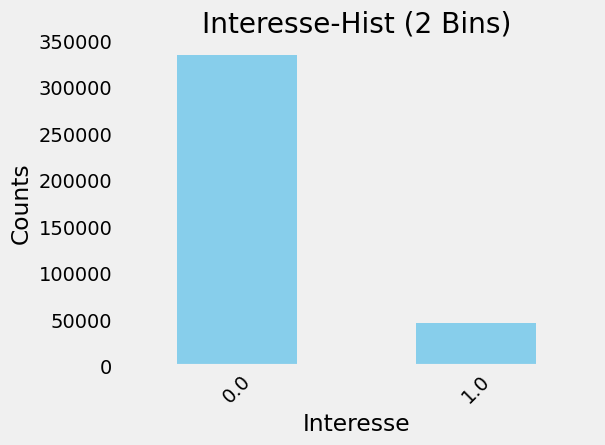

In [16]:
plot_histogram(df, "Interesse", df_info.loc["Interesse", "nunique"], 1)

### Geschlecht

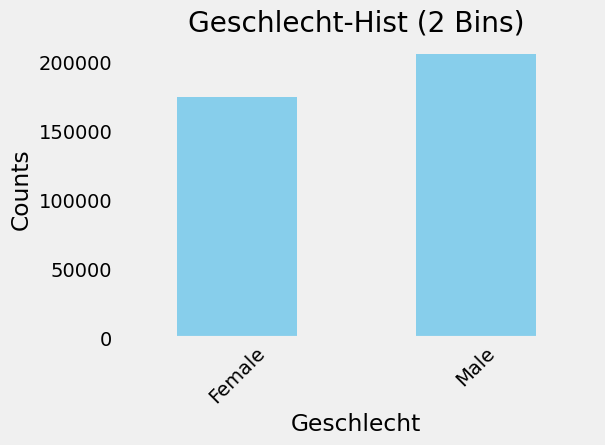

In [17]:
plot_histogram(df, "Geschlecht", df_info.loc["Geschlecht", "nunique"], 1)

### Alter

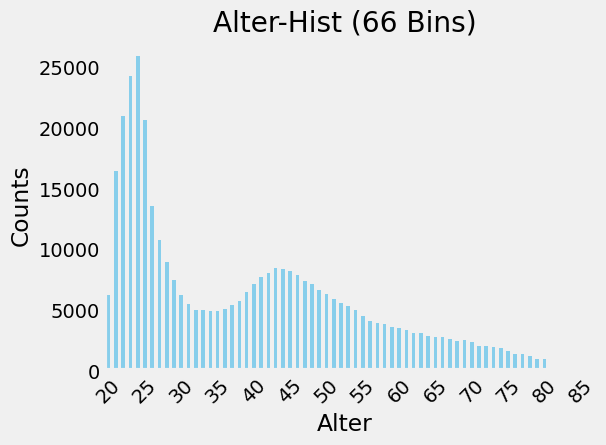

In [18]:
plot_histogram(df, "Alter", df_info.loc["Alter", "nunique"], 5)

### Fahrerlaubnis

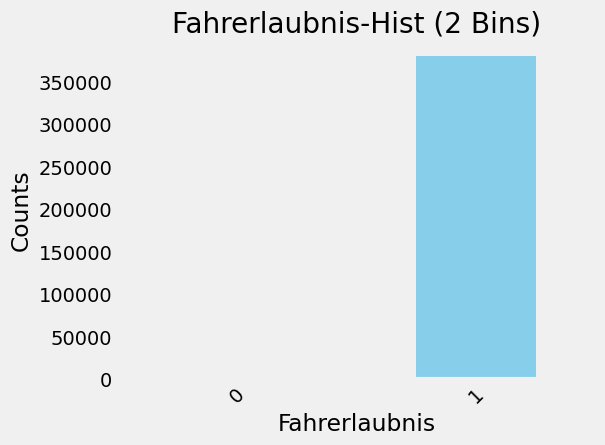

In [19]:
plot_histogram(df, "Fahrerlaubnis", df_info.loc["Fahrerlaubnis", "nunique"], 1)

### Kundentreue

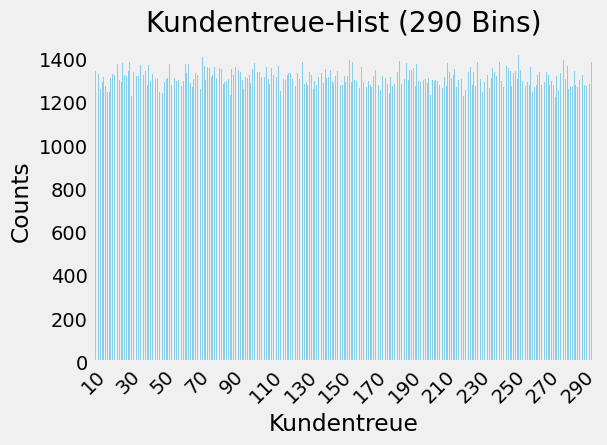

In [20]:
plot_histogram(df, "Kundentreue", df_info.loc["Kundentreue", "nunique"], 20)

### Vertriebskanal

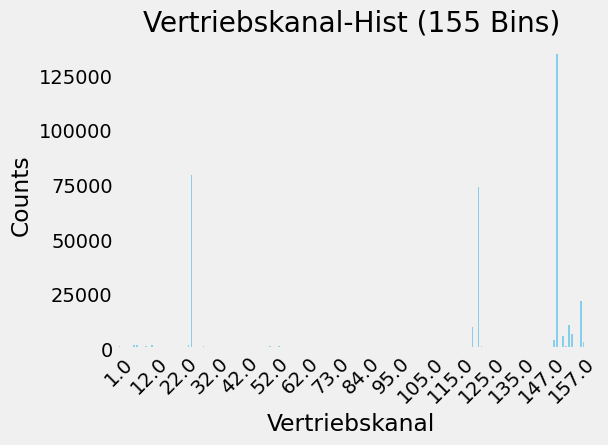

In [21]:
plot_histogram(df, "Vertriebskanal", df_info.loc["Vertriebskanal", "nunique"], 10)

### Jahresbeitrag

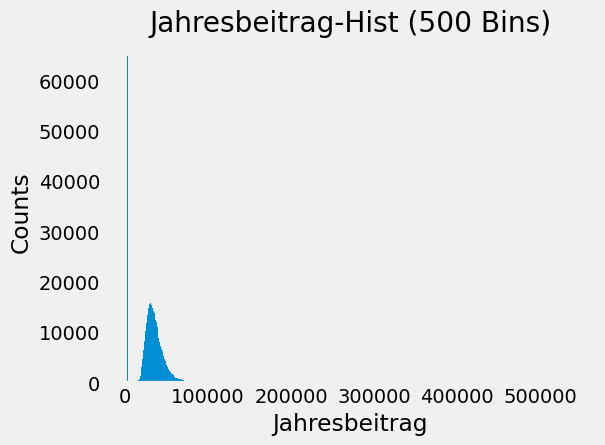

In [22]:
plot_histogram2(df, "Jahresbeitrag", 500)

In [23]:
print(f"{int((df["Jahresbeitrag"]<=2630).sum())} Kunden zahlen höchstens 2630 € Jahresbeitrag (Peak in Histogramm)")

64877 Kunden zahlen höchstens 2630 € Jahresbeitrag (Peak in Histogramm)


### Vorschaden

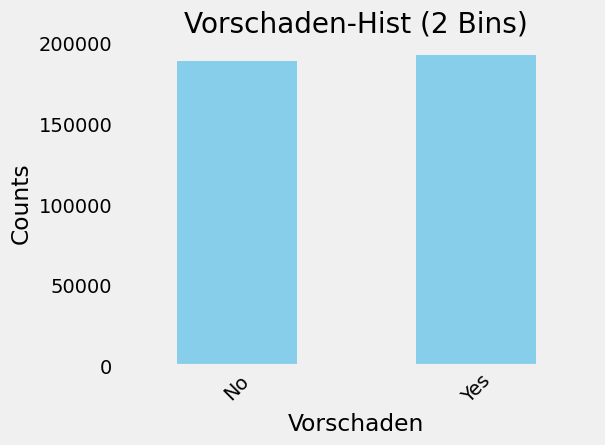

In [24]:
plot_histogram(df, "Vorschaden", df_info.loc["Vorschaden", "nunique"], 1)

### Alter_Fzg

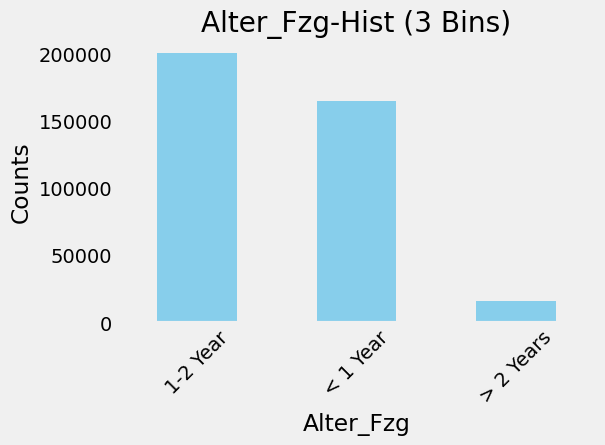

In [25]:
plot_histogram(df, "Alter_Fzg", df_info.loc["Alter_Fzg", "nunique"], 1)

### Vorversicherung

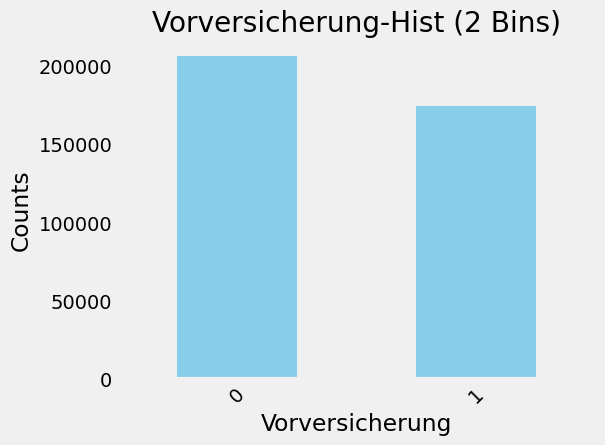

In [26]:
plot_histogram(df, "Vorversicherung", df_info.loc["Vorversicherung", "nunique"], 1)

### Regional_Code

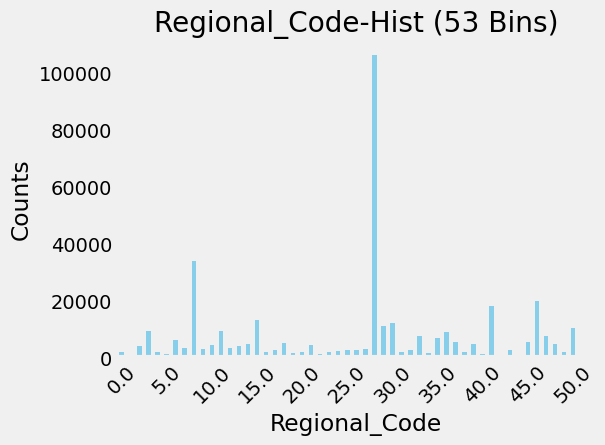

In [27]:
plot_histogram(df, "Regional_Code", df_info.loc["Regional_Code", "nunique"], 5)

## Erste Erkenntnisse zu Daten

| Merkmal        | Beschreibung  / Erkenntnisse                                                                                                                                       |
|----------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Interesse      | Binär, Zielvariable sehr unbalanciert, lediglich 12% der Kunden haben Interesse bekundet.                                                                          |
| Geschlecht     | Binär, halbwegs ausgeglichen mit einem kleinen Überschuss männlicher Kunden                                                                                        |
| Alter          | Diskret / quasi-kontinuierlich mit zwei Peaks - einem großen bei jungen Kunden und einem weiteren im mittleren Alter, sowie einem breiteren Verlauf für hohes Alter|
| Fahrerlaubnis  | Binär, Histogramm sehr einseitig (lediglich 1049 unter 508146 haben keine Fahrerlaubnis).                                                                          |
| Kundentreue    | Viele Werte (290), Histogramm sehr uniform.                                                                                                                        |
| Vertriebskanal | Konvertiere nach int, Histogramm sehr sparse (evtl. 10-20 Kanäle dominant).                                                                                        |
| Jahresbeitrag  | Hoher Peak bei 2630€ (64877 von 381109 Kunden), Schiefe Gauss-Verteilung oder Gamma-Verteilung bei höheren Jahresbeiträgen.                                        |
| Vorschaden     | Binär, quasi balanciert / nahezu gleiche Häufigkeiten.                                                                                                             |
| Alter_Fzg      | Ternär, meistens zwischen 1-2 Jahren, dann <1 Jahr, die wenigsten älter als 2 Jahre.                                                                               |
| Vorversicherung| Binär, nicht ganz balanciert; es haben mehr Kunden keine Vorversicherung.                                                                                          |
| Regional_Code  | Konvertiere nach int, Histogramm sehr sparse (evtl. 5-10 Kanäle dominant).                                                                                         |

# Feature Engineering

## Data Preprocessing

### Data-Type-Casting

Konvertiere Daten in `int64`- (diskret) bzw. `float64`- (kontinuierlich) Datentypen.

In [28]:
df_processed = df.copy()

In [29]:
df_processed[["Vertriebskanal", "Regional_Code", "Interesse"]] = df_processed[["Vertriebskanal", "Regional_Code", "Interesse"]].astype("int")

In [30]:
geschlechter_dict = {"Male": 0, "Female": 1}
df_processed.loc[:, "Geschlecht"] = df_processed["Geschlecht"].replace(geschlechter_dict)
df_processed["Geschlecht"] = df_processed["Geschlecht"].astype("int")

In [31]:
alter_dict = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
df_processed.loc[:, "Alter_Fzg"] = df_processed["Alter_Fzg"].replace(alter_dict)
df_processed["Alter_Fzg"] = df_processed["Alter_Fzg"].astype("int")

In [32]:
vorschaden_dict = {'No': 0, 'Yes': 1}
df_processed.loc[:, "Vorschaden"] = df_processed["Vorschaden"].replace(vorschaden_dict)
df_processed["Vorschaden"] = df_processed["Vorschaden"].astype("int")

In [33]:
df_processed.dtypes

Geschlecht           int64
Alter                int64
Interesse            int64
Fahrerlaubnis        int64
Regional_Code        int64
Vorversicherung      int64
Alter_Fzg            int64
Vorschaden           int64
Jahresbeitrag      float64
Vertriebskanal       int64
Kundentreue          int64
dtype: object

## Binning

**Bereite Daten für eine kausale Analyse vor, indem alle Daten gebinnt werden, um sie kompatibel mit Causal-Discovery-Methoden zu machen.**

### Kategoriale bzw. ordinale Variablen

#### Alter

In [34]:
bins_alter = [20, 30, 40, 50, 60, 100]
labels_alter = [0, 1, 2, 3, 4]
df_processed["Alter_cat"] = pd.cut(df_processed["Alter"], bins=bins_alter, labels=labels_alter, right=False)

In [35]:
df_processed[["Alter_cat", "Alter"]].value_counts().sort_index(ascending=True)

Alter_cat  Alter
0          20        6232
           21       16457
           22       20964
           23       24256
           24       25960
           25       20636
           26       13535
           27       10760
           28        8974
           29        7429
1          30        6258
           31        5512
           32        4998
           33        5010
           34        4895
           35        4936
           36        5066
           37        5408
           38        5710
           39        6460
2          40        7168
           41        7736
           42        8007
           43        8437
           44        8357
           45        8183
           46        7879
           47        7351
           48        7113
           49        6615
3          50        6263
           51        5915
           52        5590
           53        5331
           54        4997
           55        4495
           56        4063
           57        

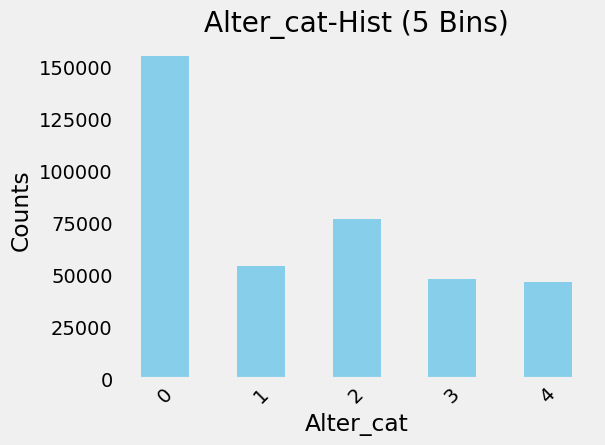

In [36]:
plot_histogram(df_processed, "Alter_cat", 5, 1)

#### Regional_Code

In [37]:
top_k_reg_code = 4
top_counts_reg_code = df_processed["Regional_Code"].value_counts()
top_values_reg_code = top_counts_reg_code.nlargest(top_k_reg_code).index
top_values_reg_code

Index([28, 8, 46, 41], dtype='int64', name='Regional_Code')

In [38]:
df_processed["Regional_Code_cat"] = df_processed["Regional_Code"].apply(lambda x: x if x in top_values_reg_code else -1)

In [39]:
df_processed[["Regional_Code_cat", "Regional_Code"]].value_counts().sort_values(ascending=False)

Regional_Code_cat  Regional_Code
 28                28               106415
 8                 8                 33877
 46                46                19749
 41                41                18263
-1                 15                13308
                   30                12191
                   29                11065
                   50                10243
                   3                  9251
                   11                 9232
                   36                 8797
                   33                 7654
                   47                 7436
                   35                 6942
                   6                  6280
                   45                 5605
                   37                 5501
                   18                 5153
                   48                 4681
                   14                 4678
                   39                 4644
                   10                 4374
                   21

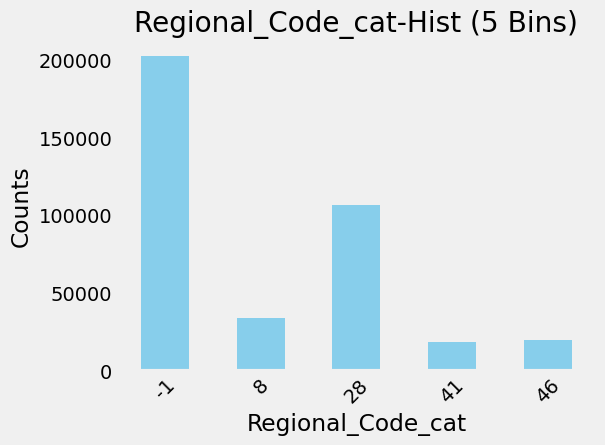

In [40]:
plot_histogram(df_processed, "Regional_Code_cat", 5, 1)

#### Vertriebskanal

In [41]:
top_k_kanal = 4
top_counts_kanal = df_processed["Vertriebskanal"].value_counts()
top_values_kanal = top_counts_kanal.nlargest(top_k_kanal).index
top_values_kanal

Index([152, 26, 124, 160], dtype='int64', name='Vertriebskanal')

In [42]:
df_processed["Vertriebskanal_cat"] = df_processed["Vertriebskanal"].apply(lambda x: x if x in top_values_kanal else -1)

In [43]:
df_processed[["Vertriebskanal_cat", "Vertriebskanal"]].value_counts().sort_values(ascending=False)

Vertriebskanal_cat  Vertriebskanal
 152                152               134784
 26                 26                 79700
 124                124                73995
 160                160                21779
-1                  156                10661
                    122                 9930
                    157                 6684
                    154                 5993
                    151                 3885
                    163                 2893
                    13                  1865
                    25                  1848
                    7                   1598
                    8                   1515
                    30                  1410
                    55                  1264
                    155                 1234
                    11                  1203
                    1                   1074
                    52                  1055
                    125                 1026
                    

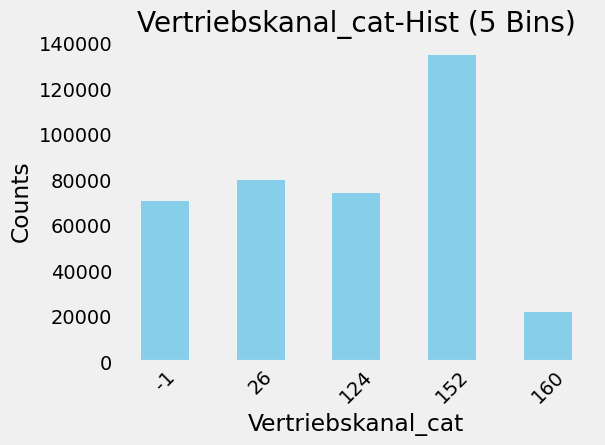

In [44]:
plot_histogram(df_processed, "Vertriebskanal_cat", 5, 1)

#### Kundentreue

In [45]:
bins_treue = [0, 100, 200, 300]
labels_treue = [0, 1, 2]
df_processed["Kundentreue_cat"] = pd.cut(df_processed["Kundentreue"], bins=bins_treue, labels=labels_treue, right=False)

In [46]:
df_processed[["Kundentreue_cat", "Kundentreue"]].value_counts().sort_index(ascending=True)

Kundentreue_cat  Kundentreue
0                10             1311
                 11             1344
                 12             1257
                 13             1329
                 14             1260
                 15             1295
                 16             1315
                 17             1274
                 18             1246
                 19             1246
                 20             1314
                 21             1330
                 22             1326
                 23             1327
                 24             1379
                 25             1305
                 26             1293
                 27             1382
                 28             1328
                 29             1322
                 30             1343
                 31             1388
                 32             1230
                 33             1339
                 34             1366
                 35             1320
         

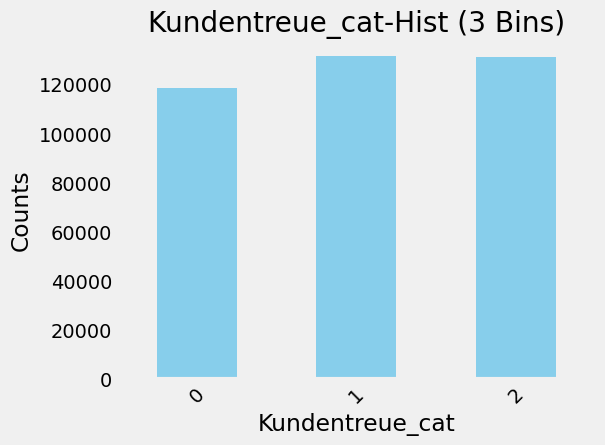

In [47]:
plot_histogram(df_processed, "Kundentreue_cat", 3, 1)

### Kontinuierliche Variablen

#### Jahresbeitrag

In [48]:
# Definiere den Schwellwert zwischen Peak (2630€) und Gauss- bzw. Gamma-Verteilung oberhalb dieses Schwellwerts
S = 2650

# Peak-Daten als eigene Kategorie markieren
from_peak = df_processed["Jahresbeitrag"] < S
df_processed["Jahresbeitrag_cat"] = np.where(from_peak, 0, 6)

# Binning für Werte oberhalb des Schwellwerts mit 4 Quantilen
from_gaussian = df_processed["Jahresbeitrag"] >= S
quantiles_beitrag, bins_beitrag = pd.qcut(df_processed.loc[from_gaussian, "Jahresbeitrag"], q=4, labels=[1, 2, 3, 4], retbins=True)
bins_beitrag_thresholds = [S] + bins_beitrag.tolist()
bins_beitrag = len(bins_beitrag_thresholds)-1
print(bins_beitrag_thresholds)
df_processed.loc[from_gaussian, "Jahresbeitrag_cat"] = quantiles_beitrag

[2650, 6098.0, 28488.0, 33985.0, 41336.0, 540165.0]


In [49]:
df_processed[["Jahresbeitrag", "Jahresbeitrag_cat"]].head()

,Jahresbeitrag,Jahresbeitrag_cat
id,,
1,40454.0,3
2,33536.0,2
3,38294.0,3
4,28619.0,2
5,27496.0,1


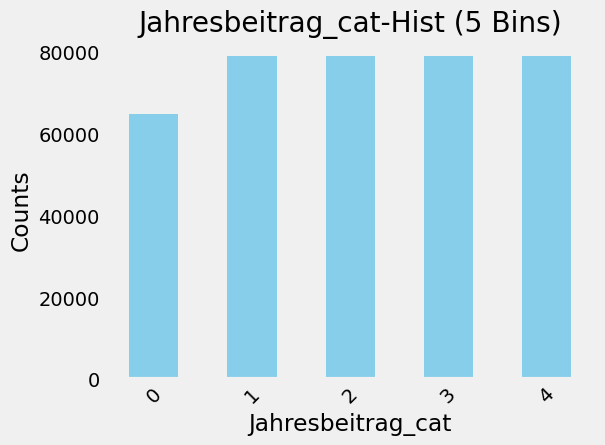

In [50]:
plot_histogram(df_processed, "Jahresbeitrag_cat", 5, 1)

# Statistische Zusammenhänge zwischen Merkmalen und Zielvariablen "Interesse"

## Hilfsfunktionen (Plotting)

In [51]:
def plot_feature_dependencies(df, x, y, hue=None, figsize=(6.5, 6.5)):
    f, ax = plt.subplots(figsize=figsize)
    sns.despine(f, left=True, bottom=True)
    sns.scatterplot(data=df, x=x, y=y, hue=hue, sizes=(1, 6), linewidth=0, alpha=0.5, ax=ax)
    plt.tight_layout(pad=1.4)
    plt.legend(loc="best")
    plt.show()

In [52]:
def boxplot(df, x, y, hue=None, figsize=(6.5, 6.5)):
    f, ax = plt.subplots(figsize=figsize)
    sns.boxplot(data=df, x=x, y=y, hue=hue, ax=ax, orient="h")
    sns.despine(offset=10, trim=True)
    plt.tight_layout(pad=1.4)
    plt.legend(loc="best")
    plt.show()

In [53]:
def violinplot(df, x, y, hue=None, figsize=(6.5, 6.5)):
    f, ax = plt.subplots(figsize=figsize)
    sns.violinplot(data=df, x=x, y=y, hue=hue, split=True, inner="quart", fill=True, alpha=0.5, ax=ax, orient="h")
    sns.despine(offset=10, trim=True)
    plt.tight_layout(pad=1.4)
    plt.xlabel(f"{x}")
    plt.ylabel("Counts")
    plt.title(f"{x}-Distribution")
    plt.tight_layout(pad=1.4)
    plt.grid(None)
    plt.show()

## Conditional Probability Plots | P(Interesse|x)

### P(Interesse|Geschlecht)

In [54]:
pd.crosstab(df_processed["Interesse"], df_processed["Geschlecht"])

Geschlecht,0,1
Interesse,,
0,177564,156835
1,28525,18185


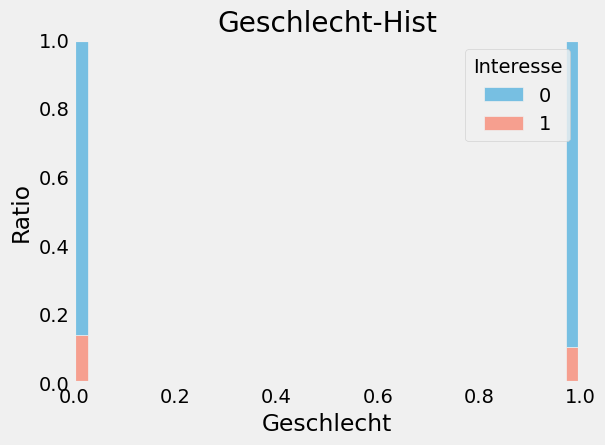

In [55]:
plot_histogram3(df=df_processed, x="Geschlecht", hue="Interesse", alpha=0.5, multiple="fill", stat="density", common_norm=True)

### P(Interesse|Vorversicherung)

In [56]:
pd.crosstab(df_processed["Interesse"], df_processed["Vorversicherung"])

Vorversicherung,0,1
Interesse,,
0,159929,174470
1,46552,158


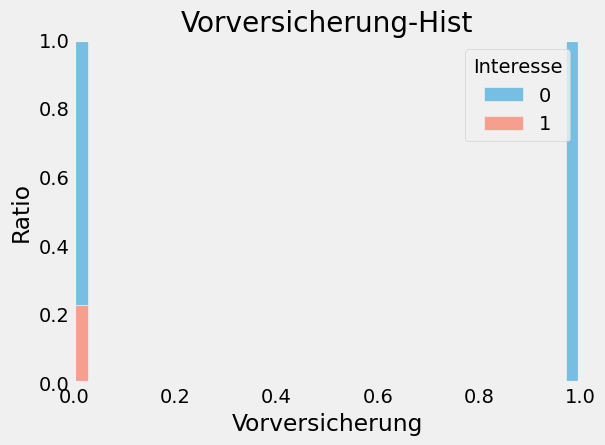

In [57]:
plot_histogram3(df=df_processed, x="Vorversicherung", hue="Interesse", alpha=0.5, multiple="fill", stat="density", common_norm=True)

### P(Interesse|Alter_cat)

In [58]:
pd.crosstab(df_processed["Interesse"], df_processed["Alter_cat"])

Alter_cat,0,1,2,3,4
Interesse,,,,,
0,148829,43397,60527,39537,42109
1,6374,10856,16319,8497,4664


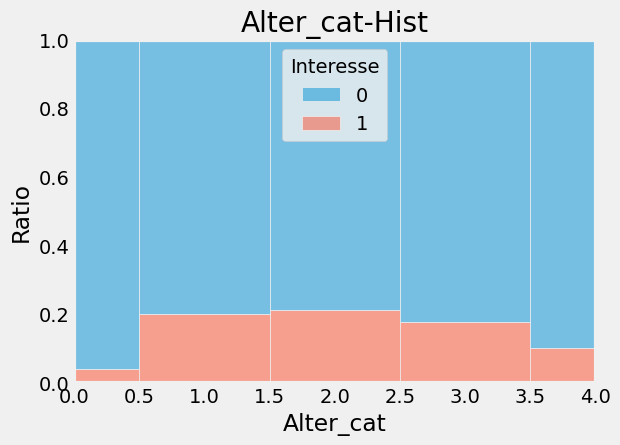

In [59]:
plot_histogram3(df=df_processed, x="Alter_cat", hue="Interesse", bins=df_processed["Alter_cat"].nunique(), alpha=0.5, multiple="fill", stat="density", common_norm=True)

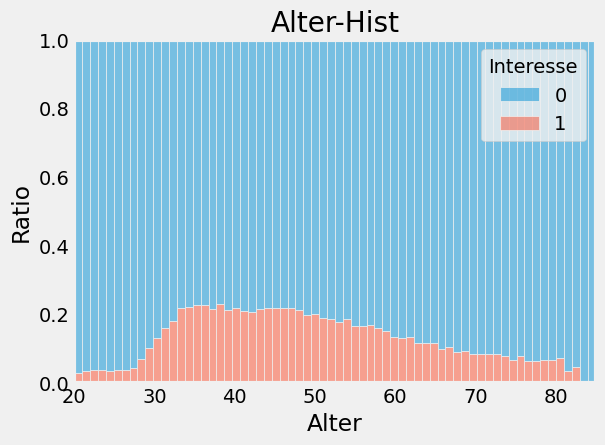

In [60]:
plot_histogram3(df=df_processed, x="Alter", hue="Interesse", bins=df_processed["Alter"].nunique(), alpha=0.5, multiple="fill", stat="density", common_norm=True)

### P(Interesse|Alter_Fzg)

In [61]:
pd.crosstab(df_processed["Interesse"], df_processed["Alter_Fzg"])

Alter_Fzg,0,1,2
Interesse,,,
0,157584,165510,11305
1,7202,34806,4702


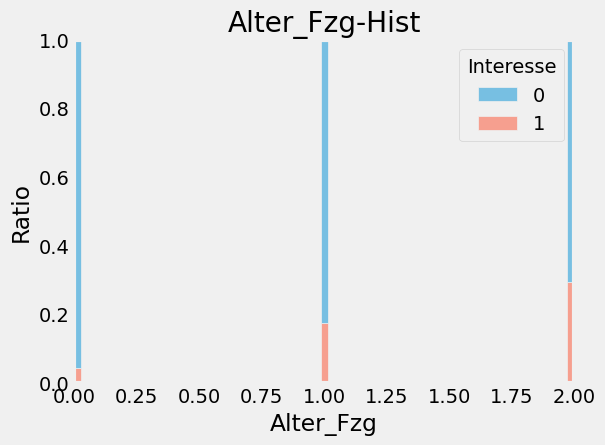

In [62]:
plot_histogram3(df=df_processed, x="Alter_Fzg", hue="Interesse", alpha=0.5, multiple="fill", stat="density", common_norm=True)

### P(Interesse|Vorschaden)

In [63]:
pd.crosstab(df_processed["Interesse"], df_processed["Vorschaden"])

Vorschaden,0,1
Interesse,,
0,187714,146685
1,982,45728


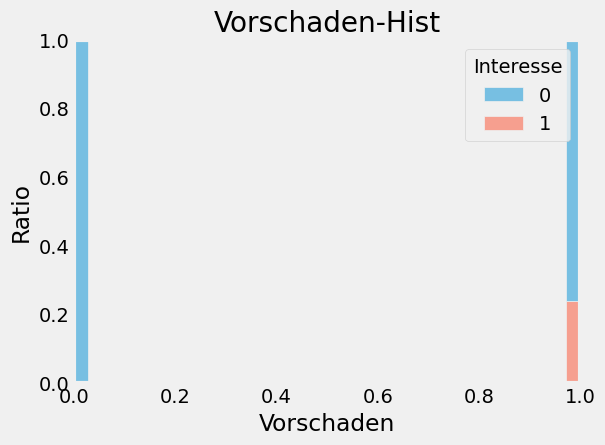

In [64]:
plot_histogram3(df=df_processed, x="Vorschaden", hue="Interesse", alpha=0.5, multiple="fill", stat="density", common_norm=True)

### P(Interesse|Fahrerlaubnis)

In [65]:
pd.crosstab(df_processed["Interesse"], df_processed["Fahrerlaubnis"])

Fahrerlaubnis,0,1
Interesse,,
0,771,333628
1,41,46669


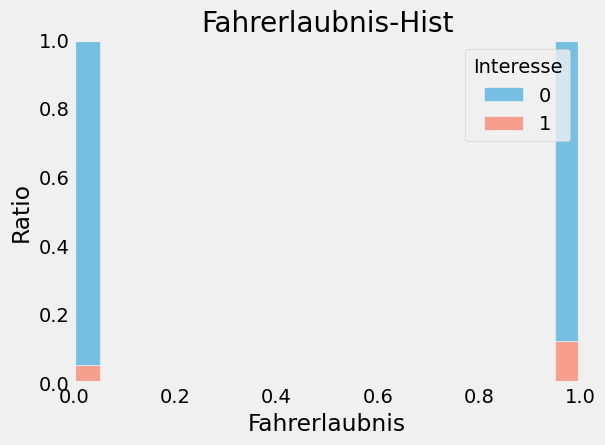

In [66]:
plot_histogram3(df=df_processed, x="Fahrerlaubnis", hue="Interesse", alpha=0.5, multiple="fill", stat="density", common_norm=True)

### P(Interesse|Regional_Code_cat)

In [67]:
pd.crosstab(df_processed["Interesse"], df_processed["Regional_Code_cat"])

Regional_Code_cat,-1,8,28,41,46
Interesse,,,,,
0,183525,30620,86498,16039,17717
1,19280,3257,19917,2224,2032


[-1, 8, 28, 41, 46]


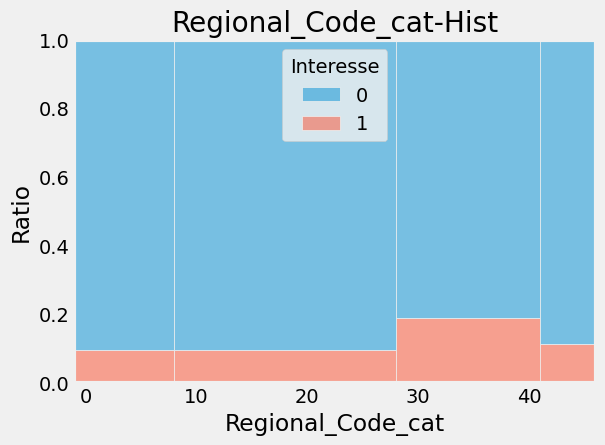

In [68]:
bins_reg_code = [-1] + sorted(top_values_reg_code.tolist())
print(bins_reg_code)
plot_histogram3(df=df_processed, x="Regional_Code_cat", hue="Interesse", bins=bins_reg_code, binrange=[min(bins_reg_code), max(bins_reg_code)], alpha=0.5, multiple="fill", stat="density",  common_norm=True)

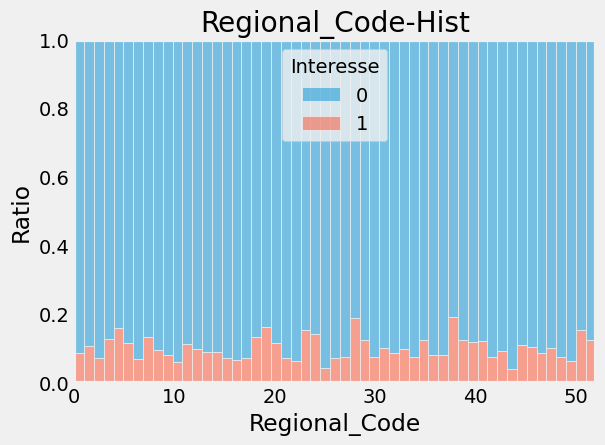

In [69]:
plot_histogram3(df=df_processed, x="Regional_Code", hue="Interesse", bins=df_processed["Regional_Code"].nunique(), alpha=0.5, multiple="fill", stat="density",  common_norm=True)

### P(Interesse|Kundentreue_cat)

In [70]:
pd.crosstab(df_processed["Interesse"], df_processed["Kundentreue_cat"])

Kundentreue_cat,0,1,2
Interesse,,,
0,103981,115404,115014
1,14508,16138,16064


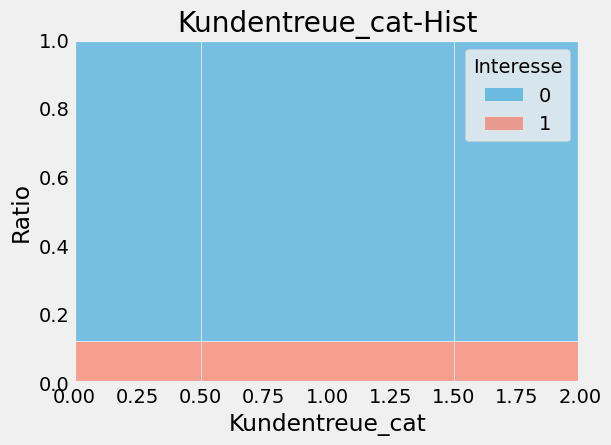

In [71]:
plot_histogram3(df=df_processed, x="Kundentreue_cat", hue="Interesse", bins=df_processed["Kundentreue_cat"].nunique(), alpha=0.5, multiple="fill", stat="density",  common_norm=True)

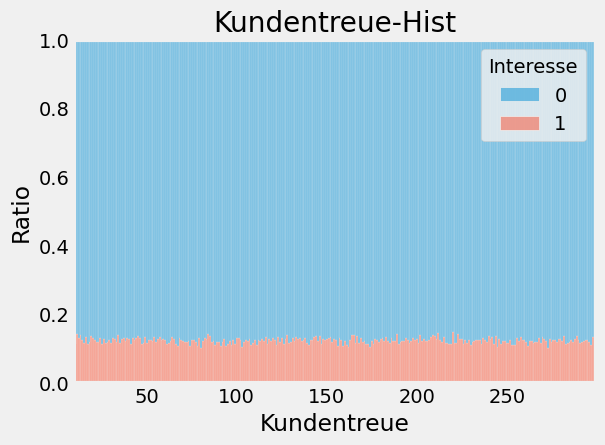

In [72]:
plot_histogram3(df=df_processed, x="Kundentreue", hue="Interesse", bins=df_processed["Kundentreue"].nunique(), alpha=0.5, multiple="fill", stat="density",  common_norm=True)

### P(Interesse|Jahresbeitrag_cat)

In [73]:
pd.crosstab(df_processed["Interesse"], df_processed["Jahresbeitrag_cat"])

Jahresbeitrag_cat,0,1,2,3,4
Interesse,,,,,
0,56372,71452,70307,68862,67406
1,8505,7615,8751,10201,11638


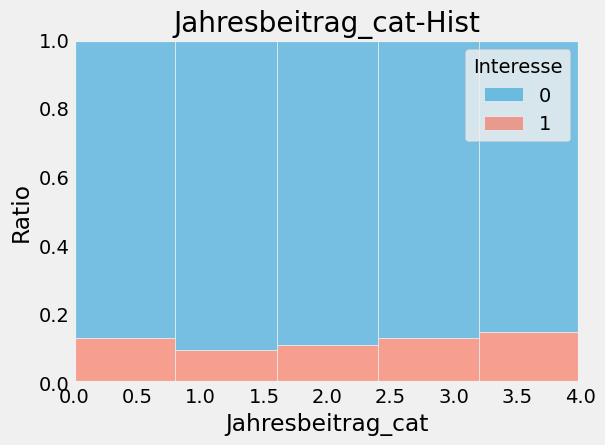

In [74]:
plot_histogram3(df=df_processed, x="Jahresbeitrag_cat", hue="Interesse", bins=bins_beitrag, alpha=0.5, multiple="fill", stat="density",  common_norm=True)

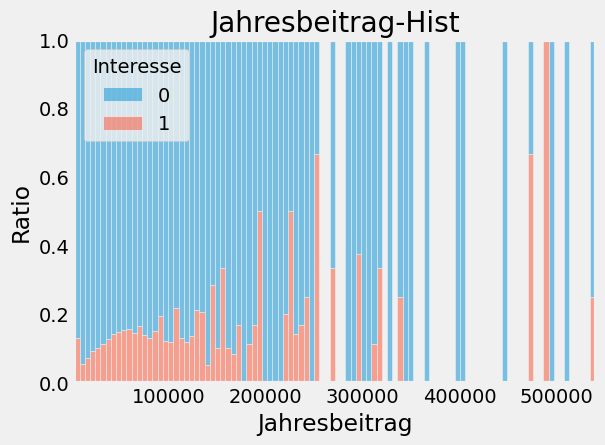

In [75]:
plot_histogram3(df=df_processed, x="Jahresbeitrag", hue="Interesse", bins=100, alpha=0.5, multiple="fill", stat="density", common_norm=True)

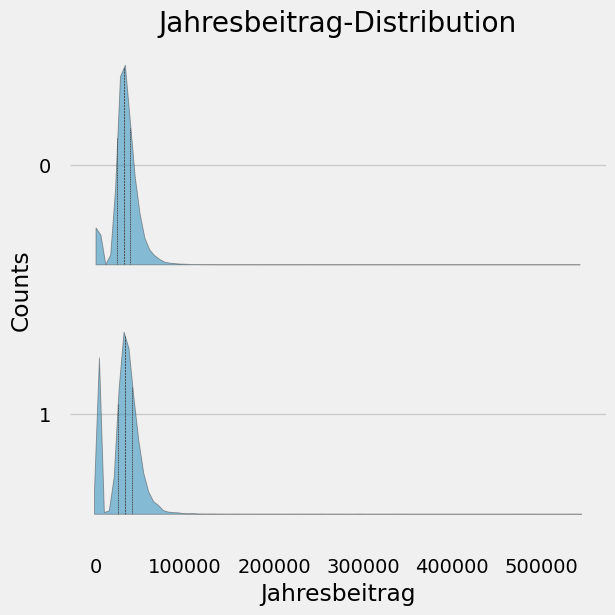

In [76]:
violinplot(df_processed, y="Interesse", x="Jahresbeitrag", hue=None)

### P(Interesse|Vertriebskanal_cat)

In [77]:
pd.crosstab(df_processed["Interesse"], df_processed["Vertriebskanal_cat"])

Vertriebskanal_cat,-1,26,124,152,160
Interesse,,,,,
0,58361,63809,59999,130926,21304
1,12490,15891,13996,3858,475


[-1, 26, 124, 152, 160]


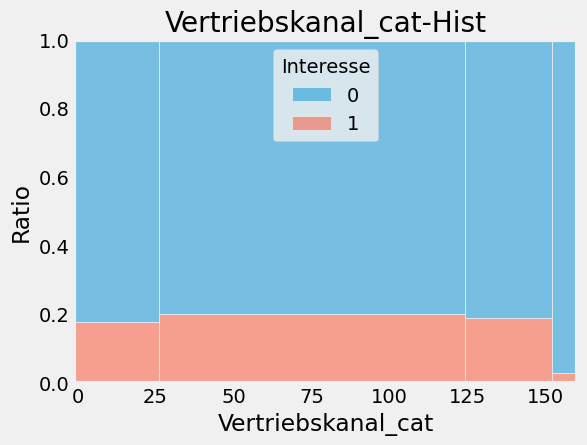

In [78]:
bins_kanal = [-1] + sorted(top_values_kanal.tolist())
print(bins_kanal)
plot_histogram3(df=df_processed, x="Vertriebskanal_cat", hue="Interesse", bins=bins_kanal, binrange=[min(bins_kanal), max(bins_kanal)], alpha=0.5, multiple="fill", stat="density",  common_norm=True)

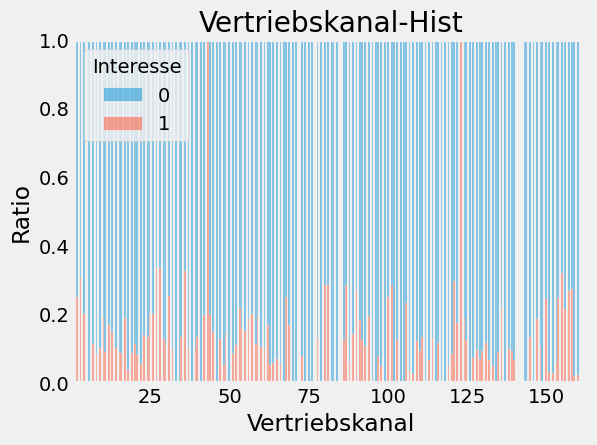

In [79]:
plot_histogram3(df=df_processed, x="Vertriebskanal", hue="Interesse", bins=290, alpha=0.5, multiple="fill", stat="density", common_norm=True)

# Causal Discovery

**In diesem Abschnitt geht es darum auszuschließen, dass eines der Merkmale einen Collider zwischen der Zielvariablen "Interesse" und anderen Merkmalen darstellt.**

**Dies ist wichtig, da man ansonsten Gefahr läuft aufgrund von Verzerrungen falsche Schlussfolgerungen zu ziehen, wenn einer dieser Collider in das Feature-Set für das zu lernende Modell aufgenommen wird.**

In [80]:
from networkx.drawing.nx_pydot import to_pydot

from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.PCUtils.BackgroundKnowledge import BackgroundKnowledge
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.graph.GraphNode import GraphNode

In [81]:
df_pc = df_processed.copy()

In [82]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Geschlecht          381109 non-null  int64   
 1   Alter               381109 non-null  int64   
 2   Interesse           381109 non-null  int64   
 3   Fahrerlaubnis       381109 non-null  int64   
 4   Regional_Code       381109 non-null  int64   
 5   Vorversicherung     381109 non-null  int64   
 6   Alter_Fzg           381109 non-null  int64   
 7   Vorschaden          381109 non-null  int64   
 8   Jahresbeitrag       381109 non-null  float64 
 9   Vertriebskanal      381109 non-null  int64   
 10  Kundentreue         381109 non-null  int64   
 11  Alter_cat           381109 non-null  category
 12  Regional_Code_cat   381109 non-null  int64   
 13  Vertriebskanal_cat  381109 non-null  int64   
 14  Kundentreue_cat     381109 non-null  category
 15  Jahresbeitrag_cat   38

In [83]:
df_pc = df_pc[["Geschlecht", "Alter_cat", "Regional_Code_cat", "Vertriebskanal_cat", "Kundentreue_cat", "Fahrerlaubnis", "Vorversicherung", "Alter_Fzg", "Vorschaden", "Jahresbeitrag_cat", "Interesse"]]

In [84]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Geschlecht          381109 non-null  int64   
 1   Alter_cat           381109 non-null  category
 2   Regional_Code_cat   381109 non-null  int64   
 3   Vertriebskanal_cat  381109 non-null  int64   
 4   Kundentreue_cat     381109 non-null  category
 5   Fahrerlaubnis       381109 non-null  int64   
 6   Vorversicherung     381109 non-null  int64   
 7   Alter_Fzg           381109 non-null  int64   
 8   Vorschaden          381109 non-null  int64   
 9   Jahresbeitrag_cat   381109 non-null  int64   
 10  Interesse           381109 non-null  int64   
dtypes: category(2), int64(9)
memory usage: 29.8 MB


In [85]:
# ordinal variables
df_pc["Kundentreue_cat"] = pd.Categorical(df_pc["Kundentreue_cat"], categories=labels_treue, ordered=True)
df_pc["Alter_cat"] = pd.Categorical(df_pc["Alter_cat"], categories=labels_alter, ordered=True)
df_pc["Alter_Fzg"] = pd.Categorical(df_pc["Alter_Fzg"], categories=[0, 1, 2], ordered=True)
df_pc["Jahresbeitrag_cat"] = pd.Categorical(df_pc["Jahresbeitrag_cat"], categories=[0, 1, 2, 3, 4], ordered=True)

# categorical variables
df_pc["Regional_Code_cat"] = pd.Categorical(df_pc["Regional_Code_cat"], ordered=False)
df_pc["Vertriebskanal_cat"] = pd.Categorical(df_pc["Vertriebskanal_cat"], ordered=False)
df_pc["Geschlecht"] = pd.Categorical(df_pc["Geschlecht"], ordered=False)
df_pc["Interesse"] = pd.Categorical(df_pc["Interesse"], ordered=False)
df_pc["Fahrerlaubnis"] = pd.Categorical(df_pc["Fahrerlaubnis"], ordered=False)
df_pc["Vorversicherung"] = pd.Categorical(df_pc["Vorversicherung"], ordered=False)
df_pc["Vorschaden"] = pd.Categorical(df_pc["Vorschaden"], ordered=False)

In [86]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Geschlecht          381109 non-null  category
 1   Alter_cat           381109 non-null  category
 2   Regional_Code_cat   381109 non-null  category
 3   Vertriebskanal_cat  381109 non-null  category
 4   Kundentreue_cat     381109 non-null  category
 5   Fahrerlaubnis       381109 non-null  category
 6   Vorversicherung     381109 non-null  category
 7   Alter_Fzg           381109 non-null  category
 8   Vorschaden          381109 non-null  category
 9   Jahresbeitrag_cat   381109 non-null  category
 10  Interesse           381109 non-null  category
dtypes: category(11)
memory usage: 6.9 MB


In [87]:
df_pc.describe()

,Geschlecht,Alter_cat,Regional_Code_cat,Vertriebskanal_cat,Kundentreue_cat,Fahrerlaubnis,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag_cat,Interesse
count,381109,381109,381109,381109,381109,381109,381109,381109,381109,381109,381109
unique,2,5,5,5,3,2,2,3,2,5,2
top,0,0,-1,152,1,1,0,1,1,1,0
freq,206089,155203,202805,134784,131542,380297,206481,200316,192413,79067,334399


**Füge Hintergrundwissen ein, indem bestimmte kausale Abhängigkeiten zwischen Variablen von vornherein ausgeschlossen werden**

**Beispielannahme: Das `Alter` hat keinen Einfluss auf das `Geschlecht` und andersherum und sollen als unabhängige Variablen betrachtet werden.**

In [88]:
background_knowledge = BackgroundKnowledge()
# Ausschluss von Kanten: 
# z.B. Knoten1 -> Knoten2 verboten: background_knowledge.add_forbidden_by_node(GraphNode("Knoten1"), GraphNode("Knoten2"))

# Geschlecht
background_knowledge.add_forbidden_by_node(GraphNode("Alter_cat"), GraphNode("Geschlecht"))
background_knowledge.add_forbidden_by_node(GraphNode("Vorschaden"), GraphNode("Geschlecht"))
background_knowledge.add_forbidden_by_node(GraphNode("Regional_Code_cat"), GraphNode("Geschlecht"))
background_knowledge.add_forbidden_by_node(GraphNode("Vertriebskanal_cat"), GraphNode("Geschlecht"))
background_knowledge.add_forbidden_by_node(GraphNode("Jahresbeitrag_cat"), GraphNode("Geschlecht"))
background_knowledge.add_forbidden_by_node(GraphNode("Kundentreue_cat"), GraphNode("Geschlecht"))
background_knowledge.add_forbidden_by_node(GraphNode("Fahrerlaubnis"), GraphNode("Geschlecht"))
background_knowledge.add_forbidden_by_node(GraphNode("Vorversicherung"), GraphNode("Geschlecht"))
background_knowledge.add_forbidden_by_node(GraphNode("Alter_Fzg"), GraphNode("Geschlecht"))
background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Geschlecht"))

# Alter_cat
background_knowledge.add_forbidden_by_node(GraphNode("Geschlecht"), GraphNode("Alter_cat"))
background_knowledge.add_forbidden_by_node(GraphNode("Vorschaden"), GraphNode("Alter_cat"))
background_knowledge.add_forbidden_by_node(GraphNode("Regional_Code_cat"), GraphNode("Alter_cat"))
background_knowledge.add_forbidden_by_node(GraphNode("Vertriebskanal_cat"), GraphNode("Alter_cat"))
background_knowledge.add_forbidden_by_node(GraphNode("Jahresbeitrag_cat"), GraphNode("Alter_cat"))
background_knowledge.add_forbidden_by_node(GraphNode("Kundentreue_cat"), GraphNode("Alter_cat"))
background_knowledge.add_forbidden_by_node(GraphNode("Fahrerlaubnis"), GraphNode("Alter_cat"))
background_knowledge.add_forbidden_by_node(GraphNode("Vorversicherung"), GraphNode("Alter_cat"))
background_knowledge.add_forbidden_by_node(GraphNode("Alter_Fzg"), GraphNode("Alter_cat"))
background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Alter_cat"))

# Alter_Fzg
background_knowledge.add_forbidden_by_node(GraphNode("Geschlecht"), GraphNode("Alter_Fzg"))
background_knowledge.add_forbidden_by_node(GraphNode("Vorschaden"), GraphNode("Alter_Fzg"))
background_knowledge.add_forbidden_by_node(GraphNode("Regional_Code_cat"), GraphNode("Alter_Fzg"))
background_knowledge.add_forbidden_by_node(GraphNode("Vertriebskanal_cat"), GraphNode("Alter_Fzg"))
background_knowledge.add_forbidden_by_node(GraphNode("Jahresbeitrag_cat"), GraphNode("Alter_Fzg"))
background_knowledge.add_forbidden_by_node(GraphNode("Kundentreue_cat"), GraphNode("Alter_Fzg"))
background_knowledge.add_forbidden_by_node(GraphNode("Fahrerlaubnis"), GraphNode("Alter_Fzg"))
background_knowledge.add_forbidden_by_node(GraphNode("Vorversicherung"), GraphNode("Alter_Fzg"))
background_knowledge.add_forbidden_by_node(GraphNode("Alter_cat"), GraphNode("Alter_Fzg"))

# Interesse
background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Alter_Fzg"))
background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Geschlecht"))
background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Vorschaden"))
background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Regional_Code_cat"))
background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Vertriebskanal_cat"))
# background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Jahresbeitrag_cat"))
# background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Kundentreue_cat"))
background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Fahrerlaubnis"))
# background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Vorversicherung"))
background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Alter_cat"))
background_knowledge.add_forbidden_by_node(GraphNode("Interesse"), GraphNode("Alter_Fzg"))

In [89]:
df_pc_np = df_pc.to_numpy()

In [90]:
column_map = {i: c for i, c in enumerate(df_pc.columns)}
column_map

{0: 'Geschlecht',
 1: 'Alter_cat',
 2: 'Regional_Code_cat',
 3: 'Vertriebskanal_cat',
 4: 'Kundentreue_cat',
 5: 'Fahrerlaubnis',
 6: 'Vorversicherung',
 7: 'Alter_Fzg',
 8: 'Vorschaden',
 9: 'Jahresbeitrag_cat',
 10: 'Interesse'}

In [91]:
# chisq-Unabhängigkeitstest, da kategoriale Variablen!
estimated_pdag = pc(df_pc_np, alpha=0.05, indep_test="chisq", stable=True, background_knowledge=background_knowledge, node_names = df_pc.columns)

  0%|          | 0/11 [00:00<?, ?it/s]

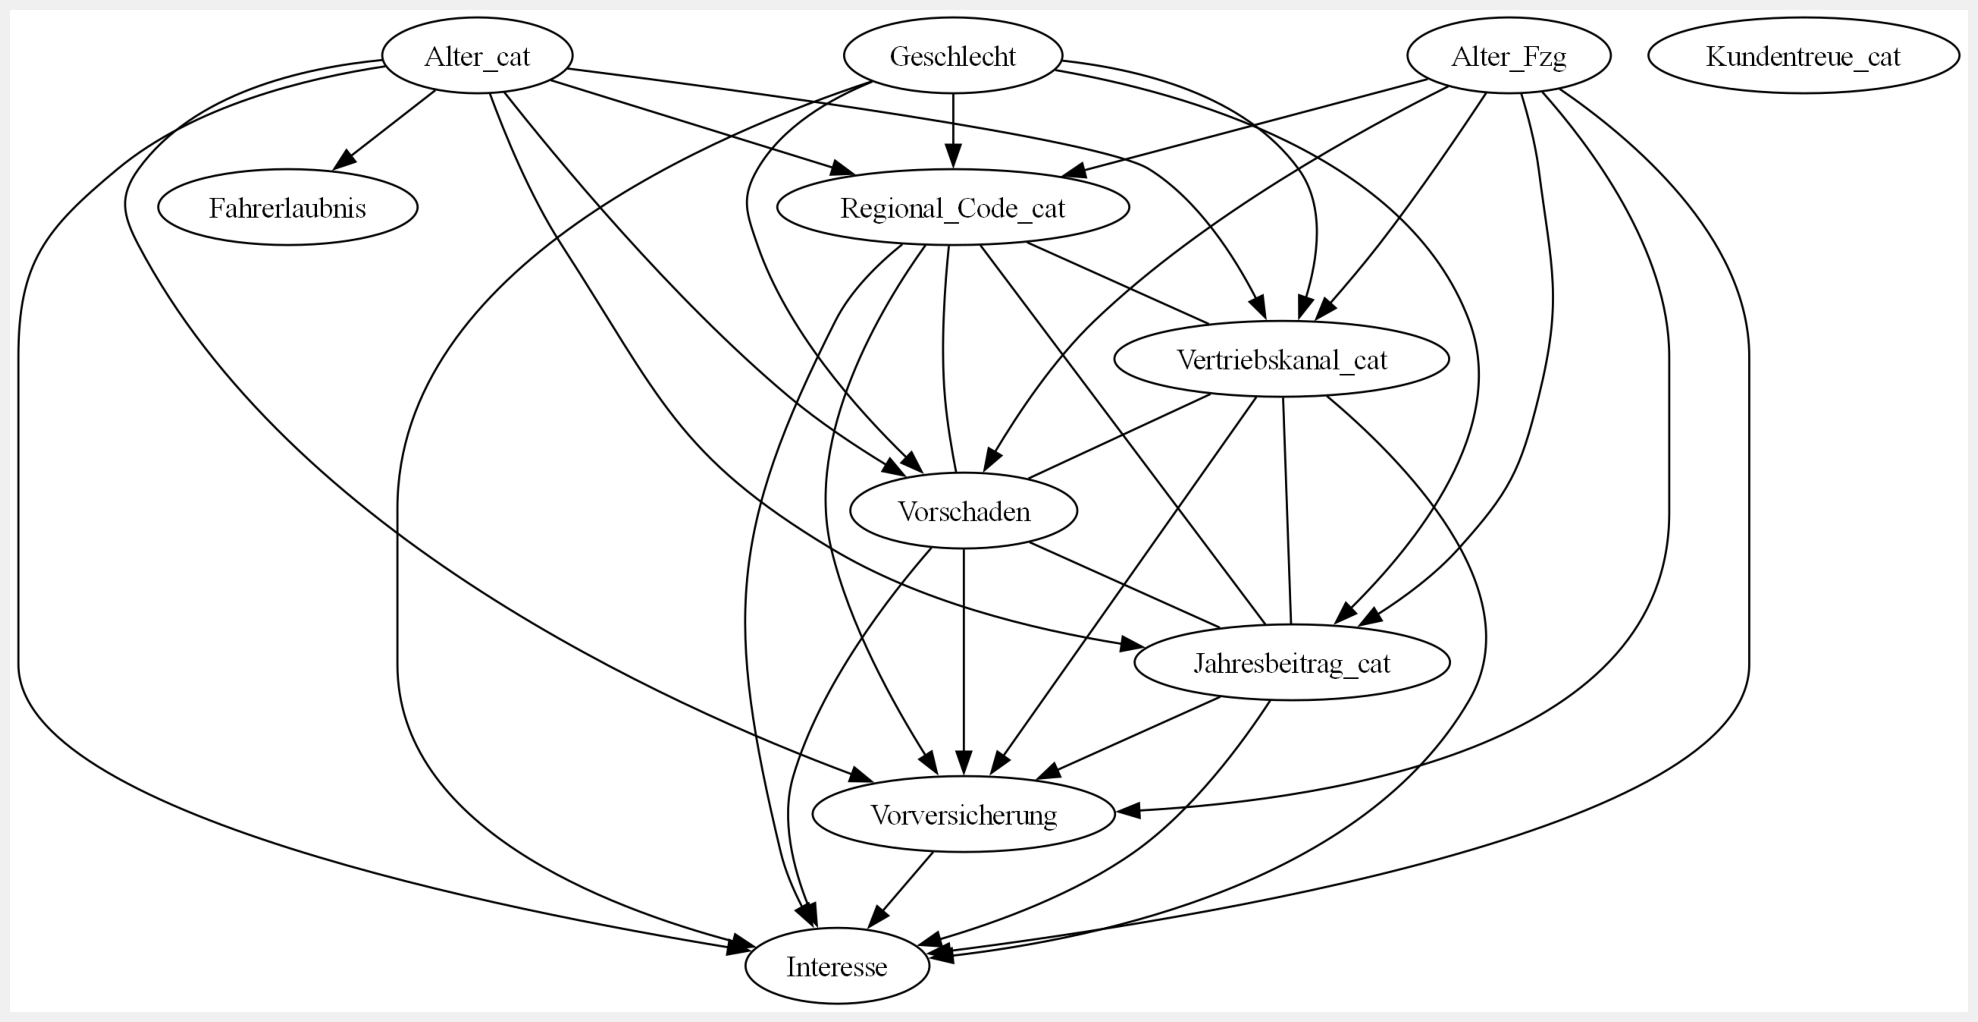

In [92]:
# visualization using pydot
estimated_pdag.draw_pydot_graph()
pyd = GraphUtils.to_pydot(estimated_pdag.G)
# pyd.write_png('HUK_DAG_causal_learn.png')

**Erkenntnisse:**
1. **`Interesse` stellt tatsächlich die Zielvariable da und hat Verbindungen zu vielen Merkmalen außer `Kundentreue` und `Fahrerlaubnis` (weitere Diskussion siehe unten)**
2. **`Kundentreue` scheint für die Vorhersage des `Interesse`s keine Rolle zu spielen.**
3. **Anmerkung: Es existieren mehrere potenzielle kausale Zusammenhänge zwischen Merkmalen, die nicht ausgeschlossen werden konnten.**

In [93]:
estimated_pdag.to_nx_graph()

In [94]:
G = estimated_pdag.nx_graph

In [95]:
G = nx.relabel_nodes(G, column_map)

In [96]:
list(G.nodes)

['Geschlecht',
 'Alter_cat',
 'Regional_Code_cat',
 'Vertriebskanal_cat',
 'Kundentreue_cat',
 'Fahrerlaubnis',
 'Vorversicherung',
 'Alter_Fzg',
 'Vorschaden',
 'Jahresbeitrag_cat',
 'Interesse']

In [97]:
list(G.edges)

[('Geschlecht', 'Regional_Code_cat'),
 ('Geschlecht', 'Vertriebskanal_cat'),
 ('Geschlecht', 'Vorschaden'),
 ('Geschlecht', 'Jahresbeitrag_cat'),
 ('Geschlecht', 'Interesse'),
 ('Alter_cat', 'Regional_Code_cat'),
 ('Alter_cat', 'Vertriebskanal_cat'),
 ('Alter_cat', 'Fahrerlaubnis'),
 ('Alter_cat', 'Vorversicherung'),
 ('Alter_cat', 'Vorschaden'),
 ('Alter_cat', 'Jahresbeitrag_cat'),
 ('Alter_cat', 'Interesse'),
 ('Regional_Code_cat', 'Vertriebskanal_cat'),
 ('Regional_Code_cat', 'Vorschaden'),
 ('Regional_Code_cat', 'Jahresbeitrag_cat'),
 ('Regional_Code_cat', 'Vorversicherung'),
 ('Regional_Code_cat', 'Interesse'),
 ('Vertriebskanal_cat', 'Regional_Code_cat'),
 ('Vertriebskanal_cat', 'Vorschaden'),
 ('Vertriebskanal_cat', 'Jahresbeitrag_cat'),
 ('Vertriebskanal_cat', 'Vorversicherung'),
 ('Vertriebskanal_cat', 'Interesse'),
 ('Vorversicherung', 'Interesse'),
 ('Alter_Fzg', 'Regional_Code_cat'),
 ('Alter_Fzg', 'Vertriebskanal_cat'),
 ('Alter_Fzg', 'Vorversicherung'),
 ('Alter_Fzg', 'Vo

**Extrahiere die direkten (kausalen) Elternknoten von `Interesse`!**

In [98]:
interest_parents = list(sorted(G.edges, key=lambda x: x[1]))
interest_parents = [element[0] for element in interest_parents if element[1]=="Interesse"]
interest_parents

['Geschlecht',
 'Alter_cat',
 'Regional_Code_cat',
 'Vertriebskanal_cat',
 'Vorversicherung',
 'Alter_Fzg',
 'Vorschaden',
 'Jahresbeitrag_cat']

# Modell-Vergleich und Modell-Wahl

**Probiere ein möglichst einfaches und interpretierbares Modell aus. Ich sehe 5 Möglichkeiten:**
1. Logistische Regression bzw. (Augmented) Conditional Logistic Regression (unter Annahme linearer Zusammenhänge, aber One-Hot-Encoding der kategorialen Variablen nötig)
2. Decision Tree Classifier (unter Annahme potenziell nichtlinearer Zusammenhänge, dafür allerdings kein One-Hot-Encoding der kategorialen Variablen nötig)
3. Random Forest Classifier (robuster, allerdings nicht einfach zu interpretieren, da es aus einem Ensemble von Entscheidungsbäumen besteht)
4. Gradient Boosting (sehr leistungsstark, allerdings ähnlich zum Random Forest Classifier nicht leicht zu interpretieren, da es sich auch hier um einen Ensemble-Ansatz handelt)
5. Neuronale Netze (Deep Learning) (kann hochdimensionale nichtlineare Beziehungen und versteckte Muster aufdecken, allerdings kaum interpretierbar, da BlackBox, und benötigt normalerweise sehr viele Daten).

**Für einen ersten Versuch benutze ich die einfachste und interpretierbareste Möglichkeit (1) - Logistische Regression**

**Wichtig: Egal, welches Modell herangezogen wird, nutze immer nur die direkten Elternknoten der Zielvariablen "Interesse" und keine "Collider" (siehe Kausaler Graph und Bemerkungen oben)**

# Modell-Building

## Überführe Variablen in Dummy-Variablen 

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
df_pc.describe()

,Geschlecht,Alter_cat,Regional_Code_cat,Vertriebskanal_cat,Kundentreue_cat,Fahrerlaubnis,Vorversicherung,Alter_Fzg,Vorschaden,Jahresbeitrag_cat,Interesse
count,381109,381109,381109,381109,381109,381109,381109,381109,381109,381109,381109
unique,2,5,5,5,3,2,2,3,2,5,2
top,0,0,-1,152,1,1,0,1,1,1,0
freq,206089,155203,202805,134784,131542,380297,206481,200316,192413,79067,334399


In [101]:
df_pc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   Geschlecht          381109 non-null  category
 1   Alter_cat           381109 non-null  category
 2   Regional_Code_cat   381109 non-null  category
 3   Vertriebskanal_cat  381109 non-null  category
 4   Kundentreue_cat     381109 non-null  category
 5   Fahrerlaubnis       381109 non-null  category
 6   Vorversicherung     381109 non-null  category
 7   Alter_Fzg           381109 non-null  category
 8   Vorschaden          381109 non-null  category
 9   Jahresbeitrag_cat   381109 non-null  category
 10  Interesse           381109 non-null  category
dtypes: category(11)
memory usage: 6.9 MB


In [102]:
# Füge "Fahrerlaubnis" als Elternknoten der Zielvariable "Interesse" hinzu, obwohl sie vom PC-Algorithmus aufgrund mangelnder Ereignisse nicht erkannt wurde.
# Begründung: Die obigen Conditional Probability Plots zeigen eine Abhängigkeit der Zielvariablen "Interesse" von "Fahrerlaubnis".

df_interesse_parents = df_pc[interest_parents+["Fahrerlaubnis"]+["Interesse"]]

In [103]:
df_encoded = pd.get_dummies(df_interesse_parents, drop_first=True)

In [104]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 381109 entries, 1 to 381109
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   Geschlecht_1            381109 non-null  bool 
 1   Alter_cat_1             381109 non-null  bool 
 2   Alter_cat_2             381109 non-null  bool 
 3   Alter_cat_3             381109 non-null  bool 
 4   Alter_cat_4             381109 non-null  bool 
 5   Regional_Code_cat_8     381109 non-null  bool 
 6   Regional_Code_cat_28    381109 non-null  bool 
 7   Regional_Code_cat_41    381109 non-null  bool 
 8   Regional_Code_cat_46    381109 non-null  bool 
 9   Vertriebskanal_cat_26   381109 non-null  bool 
 10  Vertriebskanal_cat_124  381109 non-null  bool 
 11  Vertriebskanal_cat_152  381109 non-null  bool 
 12  Vertriebskanal_cat_160  381109 non-null  bool 
 13  Vorversicherung_1       381109 non-null  bool 
 14  Alter_Fzg_1             381109 non-null  bool 
 15  Alter

In [105]:
column_names = df_encoded.columns.tolist()
feature_names = column_names[:-1]
target_name = column_names[-1]

In [106]:
feature_names

['Geschlecht_1',
 'Alter_cat_1',
 'Alter_cat_2',
 'Alter_cat_3',
 'Alter_cat_4',
 'Regional_Code_cat_8',
 'Regional_Code_cat_28',
 'Regional_Code_cat_41',
 'Regional_Code_cat_46',
 'Vertriebskanal_cat_26',
 'Vertriebskanal_cat_124',
 'Vertriebskanal_cat_152',
 'Vertriebskanal_cat_160',
 'Vorversicherung_1',
 'Alter_Fzg_1',
 'Alter_Fzg_2',
 'Vorschaden_1',
 'Jahresbeitrag_cat_1',
 'Jahresbeitrag_cat_2',
 'Jahresbeitrag_cat_3',
 'Jahresbeitrag_cat_4',
 'Fahrerlaubnis_1']

In [107]:
target_name

'Interesse_1'

In [108]:
df_encoded.head()

,Geschlecht_1,Alter_cat_1,Alter_cat_2,Alter_cat_3,Alter_cat_4,Regional_Code_cat_8,Regional_Code_cat_28,Regional_Code_cat_41,Regional_Code_cat_46,Vertriebskanal_cat_26,Vertriebskanal_cat_124,Vertriebskanal_cat_152,Vertriebskanal_cat_160,Vorversicherung_1,Alter_Fzg_1,Alter_Fzg_2,Vorschaden_1,Jahresbeitrag_cat_1,Jahresbeitrag_cat_2,Jahresbeitrag_cat_3,Jahresbeitrag_cat_4,Fahrerlaubnis_1,Interesse_1
id,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,True,False,True,True
2,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False
3,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,True,False,False,True,False,True,True
4,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,True,False
5,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,True,False


## Erstelle Trainings- & Testdaten

In [109]:
x = df_encoded[feature_names]
y = df_encoded[target_name]

In [110]:
test_size = 0.05
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)

## Erstelle Logistisches Regressionsmodell

In [111]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight="balanced")

## Trainiere Logistisches Regressionsmodell

In [112]:
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

## Mache Vorhersagen auf Testdatensatz

In [113]:
y_pred = model.predict(x_test)

## Modellbewertung

In [114]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 68.60%


In [115]:
from sklearn.metrics import confusion_matrix

def show_confusion_heat_map(y_true, y_pred, data_label: str) -> None:
    plt.figure(figsize=(4, 3))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.title(f"Konfusionsmatrix für '{data_label}'")
    plt.xlabel('Vorhersagen')
    plt.ylabel('Echte Werte')
    plt.show()

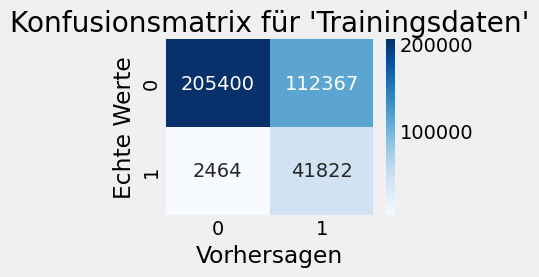


Klassifikations-Bericht: 
              precision    recall  f1-score   support

       False       0.99      0.65      0.78    317767
        True       0.27      0.94      0.42     44286

    accuracy                           0.68    362053
   macro avg       0.63      0.80      0.60    362053
weighted avg       0.90      0.68      0.74    362053



In [116]:
from sklearn.metrics import classification_report

y_train_pred = model.predict(x_train)
show_confusion_heat_map(y_train, y_train_pred, "Trainingsdaten")
print(f"\nKlassifikations-Bericht: \n{classification_report(y_train, y_train_pred)}")

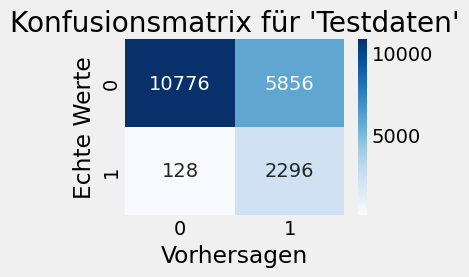


Klassifikations-Bericht: 
              precision    recall  f1-score   support

       False       0.99      0.65      0.78     16632
        True       0.28      0.95      0.43      2424

    accuracy                           0.69     19056
   macro avg       0.63      0.80      0.61     19056
weighted avg       0.90      0.69      0.74     19056



In [117]:
y_test_pred = model.predict(x_test)
show_confusion_heat_map(y_test, y_test_pred, "Testdaten")
print(f"\nKlassifikations-Bericht: \n{classification_report(y_test, y_test_pred)}")

## Ableitung relevanter Einflussfaktoren

In [118]:
coefficients = model.coef_[0].tolist()
intercept = float(model.intercept_[0])

print(f"\nIntercept={intercept:.2f}", end="\n\n")
print("Modell-Koeffizienten, sortiert in absteigender Stärke")
df_coefficients = pd.DataFrame({"Merkmal": feature_names, "Koeffizient": coefficients, "Odds Ratio": np.exp(coefficients)})
df_coefficients.sort_values(by="Koeffizient", ascending=False)


Intercept=-2.24

Modell-Koeffizienten, sortiert in absteigender Stärke


,Merkmal,Koeffizient,Odds Ratio
16,Vorschaden_1,1.970605,7.175015
21,Fahrerlaubnis_1,1.049449,2.856077
1,Alter_cat_1,0.541323,1.718278
7,Regional_Code_cat_41,0.342973,1.409131
15,Alter_Fzg_2,0.211874,1.235992
2,Alter_cat_2,0.209422,1.232966
9,Vertriebskanal_cat_26,0.203274,1.225408
17,Jahresbeitrag_cat_1,0.160552,1.174158
6,Regional_Code_cat_28,0.131824,1.140907
18,Jahresbeitrag_cat_2,0.099676,1.104813


# Diskussion der Ergebnisse

**Diskussion der Modellergebnisse und der wichtigsten Einflussfaktoren**:

* **Positiver Beitrag**: Ein `Vorschaden` **(OR: 7.18)** erhöht die Wahrscheinlichkeit am stärksten, gefolgt von `Fahrerlaubnis` **(OR: 2.86)** und jungem `Alter_cat_1` **(OR: 1.72)**.
* **Negativer Beitrag**: Eine `Vorversicherung` **(OR: 0.02)** und bestimmte `Vertriebskanäle` senken die Wahrscheinlichkeit deutlich.
* **Moderate Effekte**: Ein hohes Fahrzeugalter `Alter_Fzg_2` **(OR: 1.24)** sowie `Regionale Faktoren` und der `Jahresbeitrag` beeinflussen das Modell nur leicht.

Die logistische Regression wurde auf gebinnten Daten trainiert, wobei eine Mischung aus ursprünglich diskreten und kontinuierlichen Merkmalen in Kategorien überführt wurde. 
Die Ergebnisse zeigen eine deutliche Diskrepanz zwischen der Modellleistung für die Klassen False (Kein Interesse) und True (Interesse) der Zielvariablen `Interesse`.

**Genauigkeit und Gesamtbewertung**: 
* Mit einer Gesamtgenauigkeit (`Accuracy`) von etwa **68 %** auf den Trainings- bzw. **69 %** auf den Testdaten scheint das Modell auf den ersten Blick eine moderate Leistung zu haben.
* Allerdings zeigt ein genauerer Blick auf die Klassifikationsmetriken, dass die Genauigkeit primär von der stark ungleichen Klassenverteilung beeinflusst wird - die Klasse False (kein Interesse) dominiert mit einem viel höheren Anteil (ca. **88 %** der Daten).

**Leistung für die Mehrheitsklasse auf Testdaten (False, kein Interesse)**: 
* Die `Precision` für False ist mit **99 %** sehr hoch, was bedeutet, dass fast alle als "False" klassifizierten Instanzen tatsächlich nicht abgeschlossen wurden.
* Der `Recall` für False liegt jedoch nur bei **65 %**, was zeigt, dass ein erheblicher Anteil der tatsächlich Uninteressierten fälschlicherweise als "True" klassifiziert wird.

**Leistung für die Minderheitsklasse auf Testdaten (True, Interesse)**:
* Die `Precision` für True ist sehr niedrig **28 %**, was bedeutet, dass viele Kunden, die als interessiert (True) klassifiziert werden, in Wirklichkeit kein Interesse haben.
* Der `Recall` für True ist dagegen extrem hoch **95 %**, was zeigt, dass fast alle tatsächlichen Interessenten korrekt erkannt werden.

**Interpretation der Ergebnisse**:
* Das Modell ist darauf optimiert, möglichst viele Interessenten zu identifizieren (hoher Recall für True), nimmt dabei aber viele False Positives in Kauf (niedrige Precision für True).
Diese Verzerrung könnte durch die binning-bedingte Informationsverringerung verstärkt worden sein. Die Diskretisierung der kontinuierlichen Variablen könnte dazu geführt haben, dass wichtige Muster in den Daten verloren gingen, die für eine präzisere Trennung der Klassen notwendig wären.

**Mögliche Verbesserungen**:
* Siehe Ausblick unten

**Fazit**:
* Das Modell erkennt potenzielle Interessenten zuverlässig (hoher Recall), produziert jedoch viele False Positives (niedrige Precision).
* Eine Verfeinerung der Features, der Schwellenwerte oder der Modellarchitektur könnte dazu beitragen, ein besseres Gleichgewicht zwischen Precision und Recall zu erreichen.

# Ausblick

Wie könnte man das Modell verbessern?

Möglichkeiten zur Verbesserung des Modells für die Vorhersage der Kundenaffinität zum Abschluss einer Kfz-Versicherung:

1. **Verwendung eines ausdrucksstärkeren Modells**: Es könnte sinnvoll sein, ein leistungsfähigeres Modell zu testen (siehe Modellvorschläge oben), da möglicherweise nichtlineare Zusammenhänge zwischen den Merkmalen bestehen, die von einem linearen Modell nicht erfasst werden.
2. **Fehler durch gebinnte Daten**: Das verwendete (lineare) Modell wurde auf gebinnten Daten trainiert, was zu einem Verlust an Detailgenauigkeit in den Daten führen kann. Die so generierten Merkmale sind weniger fein granular, wodurch insbesondere bei kontinuierlichen Merkmalen wertvolle Informationen verloren gehen. Darüber hinaus könnte das Binning selbst optimiert werden, z.B. indem andere Grenzen zwischen Kategorien gezogen werden.
3. **Untersuchung des kausalen Graphen**: Der zugrunde liegende kausale Graph (d.h. der datengenerierende Prozess) sollte genauer untersucht werden, um die Ursachen zu identifizieren, wann ein Kunde ein "Interesse" für eine Kfz-Versicherung entwickelt.
4. **Berücksichtigung unbekannter, kausaler Einflussfaktoren**: Mögliche unbekannte Einflussfaktoren im datengenerierenden Prozess bzw. im kausalen Graphen wurden bislang nicht berücksichtigt. Diese könnten jedoch eine kausale Rolle beim „Interesse“ spielen und wertvolle Hinweise darauf geben, warum ein Kunde an einer Kfz-Versicherung interessiert sein könnte.